# Sales Analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Read Data

In [3]:
from glob import glob

In [5]:
all_files = glob("Sales_Data/*.csv")

In [6]:
all_files

['Sales_Data\\Sales_April_2019.csv',
 'Sales_Data\\Sales_August_2019.csv',
 'Sales_Data\\Sales_December_2019.csv',
 'Sales_Data\\Sales_February_2019.csv',
 'Sales_Data\\Sales_January_2019.csv',
 'Sales_Data\\Sales_July_2019.csv',
 'Sales_Data\\Sales_June_2019.csv',
 'Sales_Data\\Sales_March_2019.csv',
 'Sales_Data\\Sales_May_2019.csv',
 'Sales_Data\\Sales_November_2019.csv',
 'Sales_Data\\Sales_October_2019.csv',
 'Sales_Data\\Sales_September_2019.csv']

In [43]:
all_data = pd.concat((pd.read_csv(file) for file in all_files),ignore_index=True)

In [44]:
all_data = all_data.dropna(axis=0,how='all')

In [45]:
all_data.columns = all_data.columns.str.replace('\s','_')

In [48]:
all_data.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [54]:
all_data.head(20)

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
6,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016"
7,176563,Bose SoundSport Headphones,1,99.99,04/02/19 07:46,"668 Center St, Seattle, WA 98101"
8,176564,USB-C Charging Cable,1,11.95,04/12/19 10:58,"790 Ridge St, Atlanta, GA 30301"
9,176565,Macbook Pro Laptop,1,1700,04/24/19 10:38,"915 Willow St, San Francisco, CA 94016"
10,176566,Wired Headphones,1,11.99,04/08/19 14:05,"83 7th St, Boston, MA 02215"


In [55]:
all_data.Order_Date = pd.to_datetime(all_data.Order_Date,format="%m/%d/%y %H:%M",errors='coerce')

In [57]:
all_data.dropna(inplace=True)

In [59]:
number_columns = all_data.columns[2:4]

In [66]:
all_data[number_columns] = all_data[number_columns].apply(pd.to_numeric,errors='coerce')

In [67]:
all_data.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001"


In [69]:
all_data.Order_ID = all_data.Order_ID.astype('int')

In [84]:
all_data.sort_values(by='Order_Date',inplace=True)

In [94]:
months = all_data.Month.unique()

In [85]:
all_data.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Month,Revenue
73891,147268,Wired Headphones,1,11.99,2019-01-01 03:07:00,"9 Lake St, New York City, NY 10001",January,11.99
74701,148041,USB-C Charging Cable,1,11.95,2019-01-01 03:40:00,"760 Church St, San Francisco, CA 94016",January,11.95
76054,149343,Apple Airpods Headphones,1,150.00,2019-01-01 04:56:00,"735 5th St, New York City, NY 10001",January,150.00
76708,149964,AAA Batteries (4-pack),1,2.99,2019-01-01 05:53:00,"75 Jackson St, Dallas, TX 75001",January,2.99
76061,149350,USB-C Charging Cable,2,11.95,2019-01-01 06:03:00,"943 2nd St, Atlanta, GA 30301",January,23.90


In [86]:
all_data.to_csv('all_data.csv',index=False)

## What was the best month for sales?

In [78]:
all_data.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Month
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",April
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",April
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",April


In [87]:
all_data['Month'] = all_data.Order_Date.dt.month_name()

In [88]:
all_data.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Month,Revenue
73891,147268,Wired Headphones,1,11.99,2019-01-01 03:07:00,"9 Lake St, New York City, NY 10001",January,11.99
74701,148041,USB-C Charging Cable,1,11.95,2019-01-01 03:40:00,"760 Church St, San Francisco, CA 94016",January,11.95
76054,149343,Apple Airpods Headphones,1,150.00,2019-01-01 04:56:00,"735 5th St, New York City, NY 10001",January,150.00
76708,149964,AAA Batteries (4-pack),1,2.99,2019-01-01 05:53:00,"75 Jackson St, Dallas, TX 75001",January,2.99
76061,149350,USB-C Charging Cable,2,11.95,2019-01-01 06:03:00,"943 2nd St, Atlanta, GA 30301",January,23.90


In [89]:
all_data['Revenue'] = all_data['Quantity_Ordered'] * all_data['Price_Each']

In [90]:
all_data.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Month,Revenue
73891,147268,Wired Headphones,1,11.99,2019-01-01 03:07:00,"9 Lake St, New York City, NY 10001",January,11.99
74701,148041,USB-C Charging Cable,1,11.95,2019-01-01 03:40:00,"760 Church St, San Francisco, CA 94016",January,11.95
76054,149343,Apple Airpods Headphones,1,150.00,2019-01-01 04:56:00,"735 5th St, New York City, NY 10001",January,150.00
76708,149964,AAA Batteries (4-pack),1,2.99,2019-01-01 05:53:00,"75 Jackson St, Dallas, TX 75001",January,2.99
76061,149350,USB-C Charging Cable,2,11.95,2019-01-01 06:03:00,"943 2nd St, Atlanta, GA 30301",January,23.90


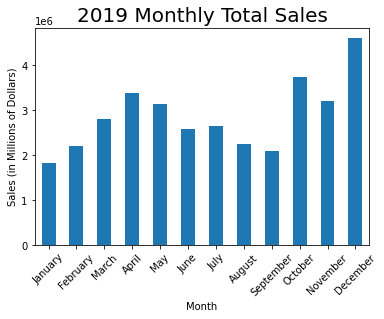

In [100]:
ax = all_data.groupby('Month').Revenue.sum()[months].plot(kind='bar')
ax.set_title("2019 Monthly Total Sales",fontsize=20)
ax.set_ylabel("Sales (in Millions of Dollars)")
ax.tick_params(axis='x',labelrotation=45)

## What city had the highest number of sales?

In [101]:
all_data.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Month,Revenue
73891,147268,Wired Headphones,1,11.99,2019-01-01 03:07:00,"9 Lake St, New York City, NY 10001",January,11.99
74701,148041,USB-C Charging Cable,1,11.95,2019-01-01 03:40:00,"760 Church St, San Francisco, CA 94016",January,11.95
76054,149343,Apple Airpods Headphones,1,150.00,2019-01-01 04:56:00,"735 5th St, New York City, NY 10001",January,150.00
76708,149964,AAA Batteries (4-pack),1,2.99,2019-01-01 05:53:00,"75 Jackson St, Dallas, TX 75001",January,2.99
76061,149350,USB-C Charging Cable,2,11.95,2019-01-01 06:03:00,"943 2nd St, Atlanta, GA 30301",January,23.90


In [107]:
all_data["City"] = all_data.Purchase_Address.str.split(',').str.get(1)

In [117]:
all_data['State'] = all_data.Purchase_Address.str.split(',').str.get(2).str.strip().str.slice(0,2)

In [118]:
all_data

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Month,Revenue,City,State
73891,147268,Wired Headphones,1,11.99,2019-01-01 03:07:00,"9 Lake St, New York City, NY 10001",January,11.99,New York City,NY
74701,148041,USB-C Charging Cable,1,11.95,2019-01-01 03:40:00,"760 Church St, San Francisco, CA 94016",January,11.95,San Francisco,CA
76054,149343,Apple Airpods Headphones,1,150.00,2019-01-01 04:56:00,"735 5th St, New York City, NY 10001",January,150.00,New York City,NY
76708,149964,AAA Batteries (4-pack),1,2.99,2019-01-01 05:53:00,"75 Jackson St, Dallas, TX 75001",January,2.99,Dallas,TX
76061,149350,USB-C Charging Cable,2,11.95,2019-01-01 06:03:00,"943 2nd St, Atlanta, GA 30301",January,23.90,Atlanta,GA
...,...,...,...,...,...,...,...,...,...,...
39308,304165,AAA Batteries (4-pack),1,2.99,2020-01-01 04:13:00,"825 Adams St, Portland, OR 97035",January,2.99,Portland,OR
34027,299125,USB-C Charging Cable,1,11.95,2020-01-01 04:21:00,"754 Hickory St, New York City, NY 10001",January,11.95,New York City,NY
41061,305840,Bose SoundSport Headphones,1,99.99,2020-01-01 04:54:00,"784 River St, San Francisco, CA 94016",January,99.99,San Francisco,CA
35497,300519,Bose SoundSport Headphones,1,99.99,2020-01-01 05:13:00,"657 Spruce St, New York City, NY 10001",January,99.99,New York City,NY


In [122]:
all_data[all_data.duplicated(subset=['City'])]

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Month,Revenue,City,State
76054,149343,Apple Airpods Headphones,1,150.00,2019-01-01 04:56:00,"735 5th St, New York City, NY 10001",January,150.00,New York City,NY
68056,141732,iPhone,1,700.00,2019-01-01 06:13:00,"446 Pine St, Atlanta, GA 30301",January,700.00,Atlanta,GA
76348,149620,Lightning Charging Cable,1,14.95,2019-01-01 06:34:00,"338 Chestnut St, San Francisco, CA 94016",January,14.95,San Francisco,CA
72609,146039,34in Ultrawide Monitor,1,379.99,2019-01-01 07:24:00,"53 River St, San Francisco, CA 94016",January,379.99,San Francisco,CA
69934,143498,AA Batteries (4-pack),3,3.84,2019-01-01 07:26:00,"428 Highland St, New York City, NY 10001",January,11.52,New York City,NY
...,...,...,...,...,...,...,...,...,...,...
39308,304165,AAA Batteries (4-pack),1,2.99,2020-01-01 04:13:00,"825 Adams St, Portland, OR 97035",January,2.99,Portland,OR
34027,299125,USB-C Charging Cable,1,11.95,2020-01-01 04:21:00,"754 Hickory St, New York City, NY 10001",January,11.95,New York City,NY
41061,305840,Bose SoundSport Headphones,1,99.99,2020-01-01 04:54:00,"784 River St, San Francisco, CA 94016",January,99.99,San Francisco,CA
35497,300519,Bose SoundSport Headphones,1,99.99,2020-01-01 05:13:00,"657 Spruce St, New York City, NY 10001",January,99.99,New York City,NY


In [127]:
all_data['City_State'] = all_data['City'] + ', ' +all_data['State']

In [128]:
all_data

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Month,Revenue,City,State,City_State
73891,147268,Wired Headphones,1,11.99,2019-01-01 03:07:00,"9 Lake St, New York City, NY 10001",January,11.99,New York City,NY,"New York City, NY"
74701,148041,USB-C Charging Cable,1,11.95,2019-01-01 03:40:00,"760 Church St, San Francisco, CA 94016",January,11.95,San Francisco,CA,"San Francisco, CA"
76054,149343,Apple Airpods Headphones,1,150.00,2019-01-01 04:56:00,"735 5th St, New York City, NY 10001",January,150.00,New York City,NY,"New York City, NY"
76708,149964,AAA Batteries (4-pack),1,2.99,2019-01-01 05:53:00,"75 Jackson St, Dallas, TX 75001",January,2.99,Dallas,TX,"Dallas, TX"
76061,149350,USB-C Charging Cable,2,11.95,2019-01-01 06:03:00,"943 2nd St, Atlanta, GA 30301",January,23.90,Atlanta,GA,"Atlanta, GA"
...,...,...,...,...,...,...,...,...,...,...,...
39308,304165,AAA Batteries (4-pack),1,2.99,2020-01-01 04:13:00,"825 Adams St, Portland, OR 97035",January,2.99,Portland,OR,"Portland, OR"
34027,299125,USB-C Charging Cable,1,11.95,2020-01-01 04:21:00,"754 Hickory St, New York City, NY 10001",January,11.95,New York City,NY,"New York City, NY"
41061,305840,Bose SoundSport Headphones,1,99.99,2020-01-01 04:54:00,"784 River St, San Francisco, CA 94016",January,99.99,San Francisco,CA,"San Francisco, CA"
35497,300519,Bose SoundSport Headphones,1,99.99,2020-01-01 05:13:00,"657 Spruce St, New York City, NY 10001",January,99.99,New York City,NY,"New York City, NY"


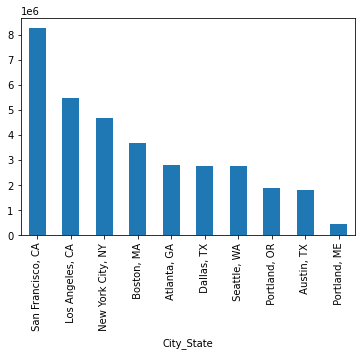

In [131]:
all_data.groupby('City_State').Revenue.sum().sort_values(ascending=False).plot(kind='bar')

## What time should advertisements be displayed to maximize likelihood of customer buying product

In [132]:
all_data.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Month,Revenue,City,State,City_State
73891,147268,Wired Headphones,1,11.99,2019-01-01 03:07:00,"9 Lake St, New York City, NY 10001",January,11.99,New York City,NY,"New York City, NY"
74701,148041,USB-C Charging Cable,1,11.95,2019-01-01 03:40:00,"760 Church St, San Francisco, CA 94016",January,11.95,San Francisco,CA,"San Francisco, CA"
76054,149343,Apple Airpods Headphones,1,150.00,2019-01-01 04:56:00,"735 5th St, New York City, NY 10001",January,150.00,New York City,NY,"New York City, NY"
76708,149964,AAA Batteries (4-pack),1,2.99,2019-01-01 05:53:00,"75 Jackson St, Dallas, TX 75001",January,2.99,Dallas,TX,"Dallas, TX"
76061,149350,USB-C Charging Cable,2,11.95,2019-01-01 06:03:00,"943 2nd St, Atlanta, GA 30301",January,23.90,Atlanta,GA,"Atlanta, GA"


In [137]:
all_data['Hour'] = all_data.Order_Date.dt.hour

In [138]:
all_data

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Month,Revenue,City,State,City_State,Hour
73891,147268,Wired Headphones,1,11.99,2019-01-01 03:07:00,"9 Lake St, New York City, NY 10001",January,11.99,New York City,NY,"New York City, NY",3
74701,148041,USB-C Charging Cable,1,11.95,2019-01-01 03:40:00,"760 Church St, San Francisco, CA 94016",January,11.95,San Francisco,CA,"San Francisco, CA",3
76054,149343,Apple Airpods Headphones,1,150.00,2019-01-01 04:56:00,"735 5th St, New York City, NY 10001",January,150.00,New York City,NY,"New York City, NY",4
76708,149964,AAA Batteries (4-pack),1,2.99,2019-01-01 05:53:00,"75 Jackson St, Dallas, TX 75001",January,2.99,Dallas,TX,"Dallas, TX",5
76061,149350,USB-C Charging Cable,2,11.95,2019-01-01 06:03:00,"943 2nd St, Atlanta, GA 30301",January,23.90,Atlanta,GA,"Atlanta, GA",6
...,...,...,...,...,...,...,...,...,...,...,...,...
39308,304165,AAA Batteries (4-pack),1,2.99,2020-01-01 04:13:00,"825 Adams St, Portland, OR 97035",January,2.99,Portland,OR,"Portland, OR",4
34027,299125,USB-C Charging Cable,1,11.95,2020-01-01 04:21:00,"754 Hickory St, New York City, NY 10001",January,11.95,New York City,NY,"New York City, NY",4
41061,305840,Bose SoundSport Headphones,1,99.99,2020-01-01 04:54:00,"784 River St, San Francisco, CA 94016",January,99.99,San Francisco,CA,"San Francisco, CA",4
35497,300519,Bose SoundSport Headphones,1,99.99,2020-01-01 05:13:00,"657 Spruce St, New York City, NY 10001",January,99.99,New York City,NY,"New York City, NY",5


Text(0.5, 1.0, '#Purchases Made Every Hour')

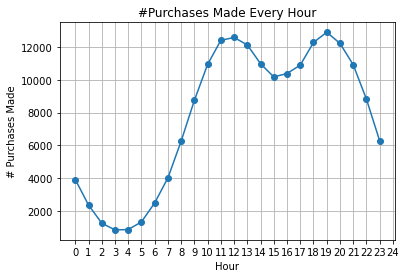

In [147]:
ax = all_data.Hour.value_counts().sort_index().plot(marker='o')
ax.set_xlabel("Hour")
ax.set_ylabel("# Purchases Made")
ax.grid()
ax.set_xticks(range(0,25))
ax.set_title("#Purchases Made Every Hour")

# Around lunctime(noon) or 6-8 PM

## What products are most often sold together?

In [153]:
all_data.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Month,Revenue,City,State,City_State,Hour
73891,147268,Wired Headphones,1,11.99,2019-01-01 03:07:00,"9 Lake St, New York City, NY 10001",January,11.99,New York City,NY,"New York City, NY",3
74701,148041,USB-C Charging Cable,1,11.95,2019-01-01 03:40:00,"760 Church St, San Francisco, CA 94016",January,11.95,San Francisco,CA,"San Francisco, CA",3
76054,149343,Apple Airpods Headphones,1,150.00,2019-01-01 04:56:00,"735 5th St, New York City, NY 10001",January,150.00,New York City,NY,"New York City, NY",4
76708,149964,AAA Batteries (4-pack),1,2.99,2019-01-01 05:53:00,"75 Jackson St, Dallas, TX 75001",January,2.99,Dallas,TX,"Dallas, TX",5
76061,149350,USB-C Charging Cable,2,11.95,2019-01-01 06:03:00,"943 2nd St, Atlanta, GA 30301",January,23.90,Atlanta,GA,"Atlanta, GA",6


In [155]:
df = all_data[all_data["Order_ID"].duplicated(keep=False)]

In [158]:
df['Grouped'] = df.groupby('Order_ID').Product.transform(lambda x: ','.join(x))

C:\Users\Dara\anaconda3\envs\DS\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [160]:
df.drop_duplicates(subset=['Order_ID'],inplace=True)

C:\Users\Dara\anaconda3\envs\DS\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [161]:
df

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Month,Revenue,City,State,City_State,Hour,Grouped
71310,144804,iPhone,1,700.00,2019-01-01 07:29:00,"628 Lake St, New York City, NY 10001",January,700.00,New York City,NY,"New York City, NY",7,"iPhone,Wired Headphones"
74737,148074,USB-C Charging Cable,1,11.95,2019-01-01 11:25:00,"6 Johnson St, Atlanta, GA 30301",January,11.95,Atlanta,GA,"Atlanta, GA",11,"USB-C Charging Cable,Google Phone"
75123,148450,iPhone,1,700.00,2019-01-01 12:02:00,"761 Lakeview St, Dallas, TX 75001",January,700.00,Dallas,TX,"Dallas, TX",12,"iPhone,Lightning Charging Cable"
71177,144679,USB-C Charging Cable,1,11.95,2019-01-01 12:51:00,"984 Lakeview St, San Francisco, CA 94016",January,11.95,San Francisco,CA,"San Francisco, CA",12,"USB-C Charging Cable,Google Phone"
74085,147451,Wired Headphones,1,11.99,2019-01-01 12:57:00,"229 Elm St, New York City, NY 10001",January,11.99,New York City,NY,"New York City, NY",12,"Wired Headphones,Google Phone"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
36859,301832,20in Monitor,2,109.99,2019-12-31 20:51:00,"774 Washington St, San Francisco, CA 94016",December,219.98,San Francisco,CA,"San Francisco, CA",20,"20in Monitor,AAA Batteries (4-pack)"
46481,311036,Macbook Pro Laptop,1,1700.00,2019-12-31 22:04:00,"138 Lincoln St, Los Angeles, CA 90001",December,1700.00,Los Angeles,CA,"Los Angeles, CA",22,"Macbook Pro Laptop,AAA Batteries (4-pack)"
46840,311386,Apple Airpods Headphones,1,150.00,2020-01-01 00:10:00,"730 Pine St, San Francisco, CA 94016",January,150.00,San Francisco,CA,"San Francisco, CA",0,"Apple Airpods Headphones,iPhone"
32659,297817,iPhone,1,700.00,2020-01-01 00:22:00,"519 13th St, New York City, NY 10001",January,700.00,New York City,NY,"New York City, NY",0,"iPhone,Lightning Charging Cable"


In [165]:
from itertools import combinations
from collections import Counter

In [172]:
c = Counter([1,2,3,3])
list(combinations([3,3,2,1],2))

[(3, 3), (3, 2), (3, 1), (3, 2), (3, 1), (2, 1)]

In [177]:
count = Counter()

for value in df['Grouped']:
    row_list = value.split(',')
    row_list.sort()
    count.update(Counter(combinations(row_list,2)))

In [181]:
count.most_common(10)

[(('Lightning Charging Cable', 'iPhone'), 1015),
 (('Google Phone', 'USB-C Charging Cable'), 999),
 (('Wired Headphones', 'iPhone'), 462),
 (('Google Phone', 'Wired Headphones'), 423),
 (('Apple Airpods Headphones', 'iPhone'), 373),
 (('USB-C Charging Cable', 'Vareebadd Phone'), 368),
 (('Bose SoundSport Headphones', 'Google Phone'), 228),
 (('USB-C Charging Cable', 'Wired Headphones'), 205),
 (('Vareebadd Phone', 'Wired Headphones'), 149),
 (('Lightning Charging Cable', 'Wired Headphones'), 129)]

## What product sold the most? and why do you think it sold the most?

In [182]:
all_data.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Month,Revenue,City,State,City_State,Hour
73891,147268,Wired Headphones,1,11.99,2019-01-01 03:07:00,"9 Lake St, New York City, NY 10001",January,11.99,New York City,NY,"New York City, NY",3
74701,148041,USB-C Charging Cable,1,11.95,2019-01-01 03:40:00,"760 Church St, San Francisco, CA 94016",January,11.95,San Francisco,CA,"San Francisco, CA",3
76054,149343,Apple Airpods Headphones,1,150.00,2019-01-01 04:56:00,"735 5th St, New York City, NY 10001",January,150.00,New York City,NY,"New York City, NY",4
76708,149964,AAA Batteries (4-pack),1,2.99,2019-01-01 05:53:00,"75 Jackson St, Dallas, TX 75001",January,2.99,Dallas,TX,"Dallas, TX",5
76061,149350,USB-C Charging Cable,2,11.95,2019-01-01 06:03:00,"943 2nd St, Atlanta, GA 30301",January,23.90,Atlanta,GA,"Atlanta, GA",6


In [190]:
quantities = all_data.groupby("Product").Quantity_Ordered.sum().sort_values(ascending=False)

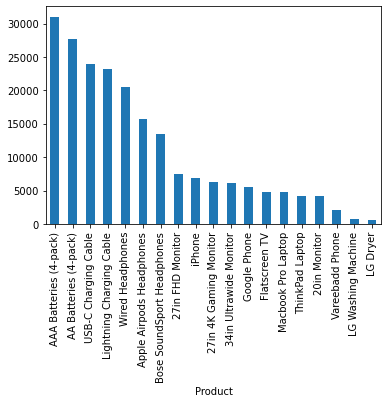

In [191]:
ax = quantities.plot(kind='bar')
ax.set_ylabel("Quantity Ordered")
ax.set_xlabel("Product")

In [192]:
prices = all_data.groupby("Product").Price_Each.mean()

In [195]:
prices = prices[quantities.index].copy()

In [196]:
prices

Product
AAA Batteries (4-pack)           2.99
AA Batteries (4-pack)            3.84
USB-C Charging Cable            11.95
Lightning Charging Cable        14.95
Wired Headphones                11.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
27in FHD Monitor               149.99
iPhone                         700.00
27in 4K Gaming Monitor         389.99
34in Ultrawide Monitor         379.99
Google Phone                   600.00
Flatscreen TV                  300.00
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
20in Monitor                   109.99
Vareebadd Phone                400.00
LG Washing Machine             600.00
LG Dryer                       600.00
Name: Price_Each, dtype: float64

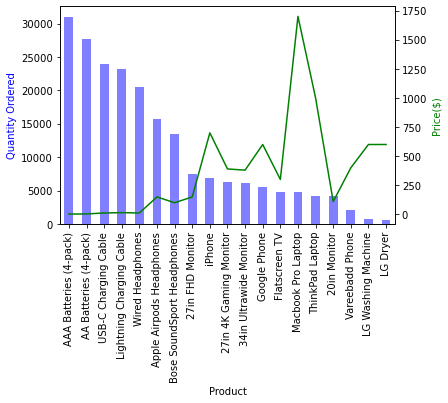

In [204]:
ax = quantities.plot(kind='bar',alpha=0.5,color='blue')
ax.set_ylabel("Quantity Ordered",color='blue')
ax.set_xlabel("Product")

ax2 = ax.twinx()
ax2.set_ylabel("Price($)",color='green')
prices.plot(ax=ax2,color='green')